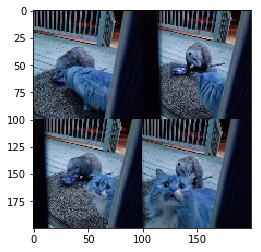

In [1]:
import cv2
img = cv2.imread('test.jpg')
img = cv2.resize(img, (200,200))

import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [2]:
img.shape

(200, 200, 3)

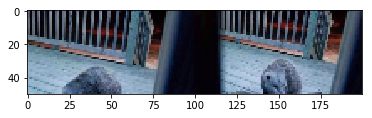

In [3]:
img1 = img[0:50,:,:]
plt.imshow(img1)
plt.show()

In [4]:
from random import randint
randint(-5,6)

-5

In [5]:
img = cv2.imread('test.jpg')
img = cv2.resize(img, (300,300))
h, w, c = img.shape
def in_range(x, y):
    if x>=0 and x<= w and y>=0 and y<=h:
        return True
    return False

from random import randint
from math import sqrt
# tunable parameters
# spark center radius = r, spark strength = s, spark density = d
# kernel speed = k_s
r = 15
k_s = 10
s = 10
d = 10
bw = 2 # blob width factor
# 1. Select spark center
h, w, c = img.shape
cenX = w//2
cenY = h//2
cenX = cenX + randint(-r,r)
cenY = cenY + randint(-r,r)

# 2. Generate sparks
speed_pairs = [(0, k_s), (k_s, k_s), (k_s, 0),
               (0, -k_s), (-k_s, -k_s), (-k_s, 0)]

csd = randint(d-k_s, d+k_s)

while(csd > 0):
    csd -= 1
    cks_idx = randint(0, len(speed_pairs)-1)
    cks = speed_pairs[cks_idx]
    fluc = randint(-int(k_s//sqrt(2)), int(k_s//sqrt(2)))
    # shift
    dx = cks[0] + fluc # + randint(-k_s//2,k_s//2)
    dy = cks[1] + fluc # + randint(-k_s//2,k_s//2)
    css = randint(s//3, s)
    cx = cenX
    cy = cenY
    while(css > 0):
        css -= 1
        cx = cx + dx + randint(-k_s//2,k_s//2)
        cy = cy + dy + randint(-k_s//2,k_s//2)
        if in_range(cx, cy):
            w1 = randint(1,2*bw)
            w2 = randint(1,2*bw)
            w3 = randint(1,2*bw)
            w4 = randint(1,2*bw)
            
            try:
                if cx > cenX:
                    crop_part1 = img[cy-w3:cy+w4,:cx+w2,:]
                    res_crop = cv2.resize(crop_part1,(cx-w1, w4+w3))
                    img[cy-w3:cy+w4,:cx-w1,:] = res_crop
                if cx <= cenX:
                    crop_part1 = img[cy-w3:cy+w4,cx-w1:,:]
                    res_crop = cv2.resize(crop_part1,(w-cx-w2, w4+w3))
                    img[cy-w3:cy+w4,cx+w2:,:] = res_crop
                if cy > cenY:
                    crop_part1 = img[:cy+w4,cx-w1:cx+w2,:]
                    res_crop = cv2.resize(crop_part1,(w1+w2, cy-w3))
                    img[:cy-w3,cx-w1:cx+w2,:] = res_crop
                if cy <= cenY:
                    crop_part1 = img[cy-w3:,cx-w1:cx+w2,:]
                    res_crop = cv2.resize(crop_part1,(w1+w2, h-cy-w4))
                    img[cy+w4:,cx-w1:cx+w2,:] = res_crop

            except:
                pass
            img[cx-w1:cx+w2,cy-w3:cy+w4,:] = 255

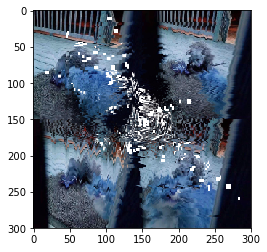

In [6]:
plt.imshow(img)
plt.show()

In [22]:
k_s = 10
speed_pairs = [(0, k_s), (k_s, k_s), (k_s, 0),
               (0, -k_s), (-k_s, -k_s), (-k_s, 0)]
a = speed_pairs[0]
print(a[1])

10


In [11]:
img = cv2.imread('test.jpg')
img = cv2.resize(img, (300,300))
h, w, c = img.shape
def in_range(x, y):
    if x>=0 and x<= w and y>=0 and y<=h:
        return True
    return False

from random import randint
from math import sqrt
# generate random curved lines 
# tunable parameters
# spark center radius = r, spark strength = s, spark density = d
# kernel speed = k_s
r = 15
k_s = 1
s = 100
d = 30
bw = 1 # blob width factor
# 1. Select spark center
h, w, c = img.shape
cenX = w//2
cenY = h//2
cenX = cenX + randint(-r,r)
cenY = cenY + randint(-r,r)

# 2. Generate sparks
speed_pairs = [(0, k_s), (k_s, k_s), (k_s, 0),
               (0, -k_s), (-k_s, -k_s), (-k_s, 0)]

csd = randint(d-k_s, d+k_s)
while(csd > 0):
    cenX =  randint(5,w-5)
    cenY =  randint(5,h-5)
    csd -= 1
    cks_idx = randint(0, len(speed_pairs)-1)
    cks = speed_pairs[cks_idx]
    fluc = randint(-int(k_s//sqrt(2)), int(k_s//sqrt(2)))
    # shift
    dx = cks[0] + fluc # + randint(-k_s//2,k_s//2)
    dy = cks[1] + fluc # + randint(-k_s//2,k_s//2)
    css = randint(s//3, s)
    cx = cenX
    cy = cenY
    while(css > 0):
        css -= 1
        cx = cx + dx + randint(-k_s//2,k_s//2)
        cy = cy + dy + randint(-k_s//2,k_s//2)
        if in_range(cx, cy):
            w1 = randint(1,2*bw)
            w2 = randint(1,2*bw)
            w3 = randint(1,2*bw)
            w4 = randint(1,2*bw)
            img[cx-w1:cx+w2,cy-w3:cy+w4,:] = 255

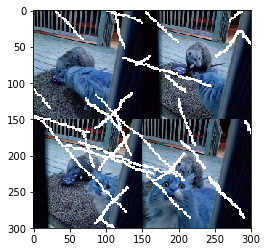

In [12]:
plt.imshow(img)
plt.show()